In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
netflix_data = pd.read_csv('desktop/CSV.FILES/netflix_titles.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
netflix_data.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [5]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
netflix_data.fillna('Unknown', inplace=True)

In [7]:
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

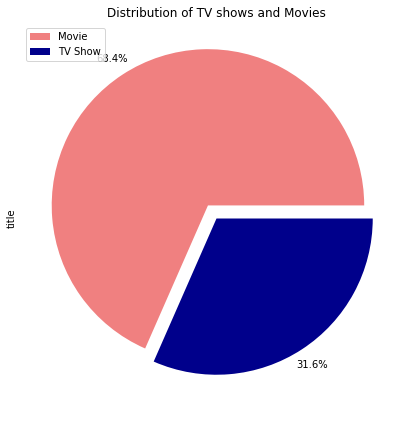

In [9]:
pie_df=netflix_data.groupby('type', axis=0).count()
pie_df['title'].plot(kind='pie',
                    figsize=(7,8),
                    autopct='%1.1f%%',
                    pctdistance=1.12,
                    explode=(0.1,0),
                    colors=['lightcoral','darkblue'],
                    labels=None)
plt.legend(labels=pie_df.index, loc='upper left')
plt.title('Distribution of TV shows and Movies')
plt.show()

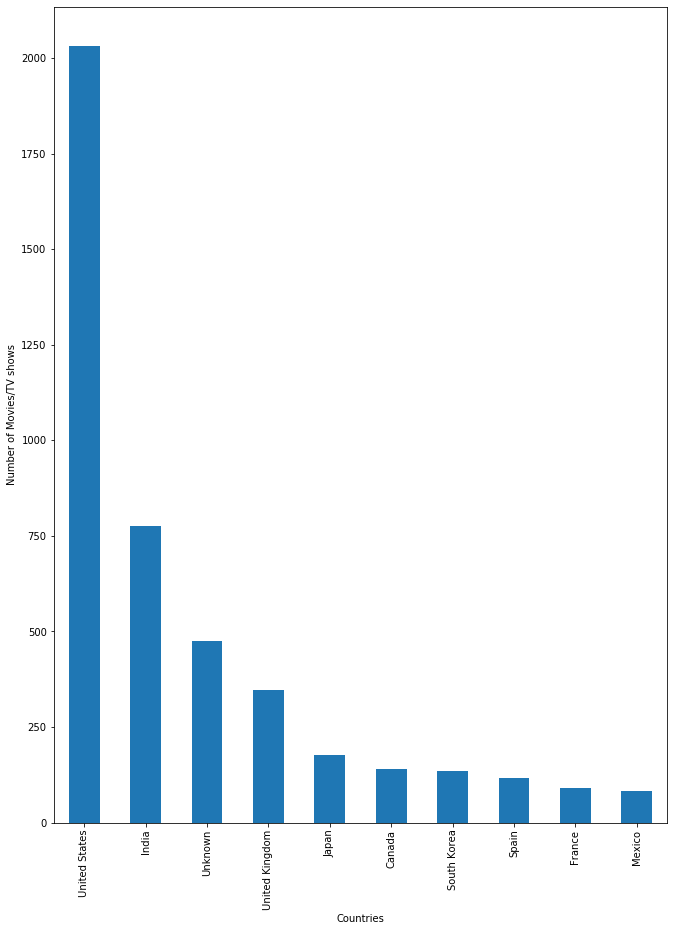

In [11]:
bar_conti=netflix_data.groupby('country').count()
bar=bar_conti.nlargest(10, 'show_id')
bar['show_id'].plot(kind='bar', figsize=(11,15))
plt.xlabel('Countries')
plt.ylabel('Number of Movies/TV shows')
plt.show()

This shows highest shows being telecasted in US

In [14]:
genere=netflix_data.groupby('listed_in').count()
genere.sort_values(by='show_id', inplace=True, ascending=False)
genere_top=genere.head(20)

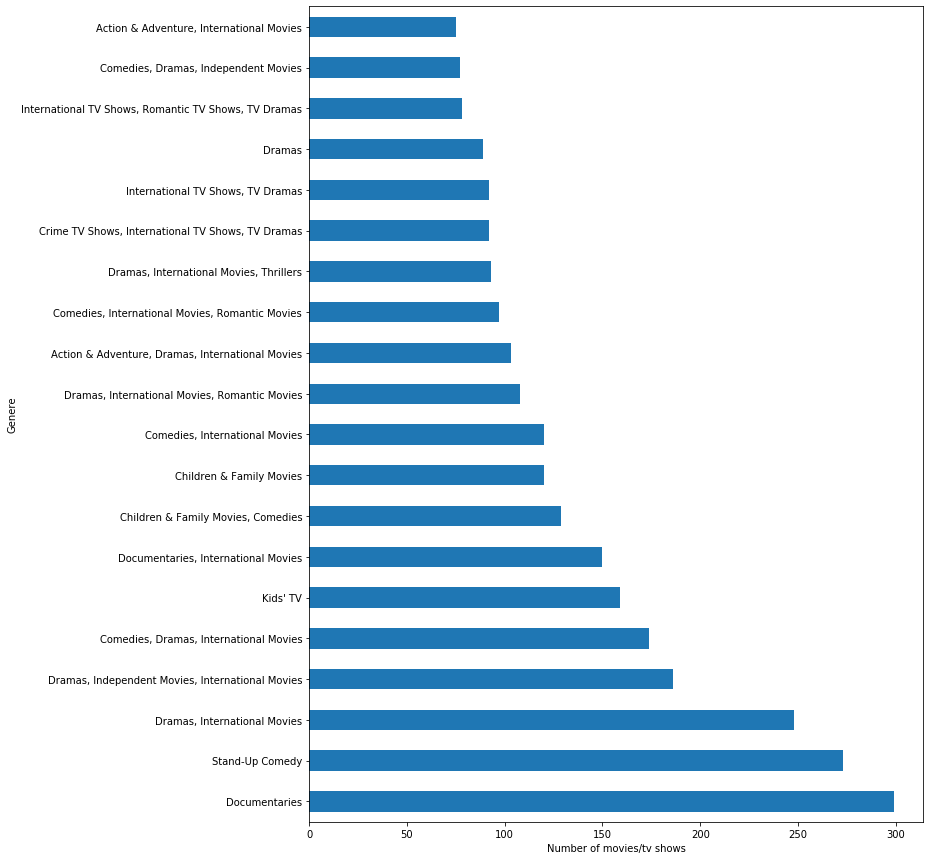

In [15]:
genere_top['show_id'].plot(kind='barh', figsize=(11,15))
plt.xlabel('Number of movies/tv shows')
plt.ylabel('Genere')
plt.show()

In [17]:
netflix_data.set_index('title', inplace=True)

In [18]:
def get_recomendation(liked):
    type=netflix_data.loc[liked,'type']
    country=netflix_data.loc[liked,'country']
    genere=netflix_data.loc[liked,'listed_in']
    
    req=netflix_data[netflix_data['country']==country]
    required=req[req['listed_in']==genere]
    req1=required[required['type']==type]
    return(req1.index.tolist())

For example, you like Friends. The recommended shows for you will be:

In [19]:
liked='Friends'
get_recomendation(liked)

['Cheers', 'The Andy Griffith Show', 'Frasier', 'Friends']

Say you like PK movie, then the recomendation will be:

In [20]:
like='PK'
get_recomendation(like)

['PK',
 'Watchman',
 'Manmadhudu 2',
 'Upstarts',
 'Jatt James Bond',
 'Judge Singh LLB',
 'Manje Bistre',
 'Saadey CM Saab',
 'Sat Shri Akaal England',
 'Mubarakan',
 'The Zoya Factor',
 'Rajma Chawal',
 'Barfi!',
 'Chance Pe Dance',
 'Chup Chup Ke',
 'Hattrick',
 'Katti Batti',
 'Oye Lucky! Lucky Oye!',
 'Welcome to Sajjanpur',
 'Zero',
 'Laatu',
 'EMI: Liya Hai To Chukana Padega',
 'Kabhi Haan Kabhi Naa',
 'Sur Sapata',
 'Abby Sen',
 'Bittoo Boss',
 'English Babu Desi Mem',
 'Oh My God',
 'One by Two',
 'Pyaar Ka Punchnama',
 'Pyaar Ka Punchnama 2',
 'Queen',
 'Tanu Weds Manu',
 'War Chhod Na Yaar',
 'Chal Dhar Pakad',
 'Haapus',
 'Irada Pakka',
 'Super Nani',
 'Super Deluxe',
 'Lust Stories',
 'Kanavu Variyam',
 'Anthony Kaun Hai?',
 'Cappuccino',
 'Deewana Main Deewana',
 'Tum Milo Toh Sahi',
 'Professor',
 'Next Enti?',
 'Made in China',
 'Aajcha Divas Majha',
 'Aata Pita',
 'Kay Dyache Bola',
 'Sanai Choughade',
 'Time Please',
 'Yanda Kartavya Aahe',
 'Fatso',
 'Matichya Chuli'

In [27]:
liked='family'
get_recomendation(liked)

KeyError: 'family'